In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
from utils import load_svhn_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_svhn_data()

In [4]:
import network, train, utils
from layers import ReluLayer, BinaryFullyConnectedLayer, \
    BinaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer, DropOutLayer

In [5]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10,
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(BinaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(BinaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [6]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [7]:
opt.set_rho(0.5)
opt.set_ema_rates(0.999)

In [8]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []

n_epochs = 200

for t in range(n_epochs):    
    print('Epoch: ', t)
    opt.train_epoch(batch_size=100, ema_decay=0.95, n_output=10, verbose=True)

    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 2.741800, 0.12
Iter: 68 of 682 || Estimated train loss/acc: 2.645128, 0.07
Iter: 136 of 682 || Estimated train loss/acc: 2.148207, 0.19
Iter: 204 of 682 || Estimated train loss/acc: 1.892320, 0.24
Iter: 272 of 682 || Estimated train loss/acc: 1.736496, 0.26
Iter: 340 of 682 || Estimated train loss/acc: 1.579108, 0.33
Iter: 408 of 682 || Estimated train loss/acc: 1.436197, 0.32
Iter: 476 of 682 || Estimated train loss/acc: 1.257186, 0.52
Iter: 544 of 682 || Estimated train loss/acc: 1.185524, 0.52
Iter: 612 of 682 || Estimated train loss/acc: 1.148023, 0.52
Iter: 680 of 682 || Estimated train loss/acc: 0.963163, 0.68
Train loss/acc:  (1.039190236265046, 0.61907203723745197) Test loss/acc:  (1.0469915124632936, 0.59234

Iter: 68 of 682 || Estimated train loss/acc: 0.033434, 0.95
Iter: 136 of 682 || Estimated train loss/acc: 0.045168, 0.93
Iter: 204 of 682 || Estimated train loss/acc: 0.042101, 0.93
Iter: 272 of 682 || Estimated train loss/acc: 0.025745, 0.96
Iter: 340 of 682 || Estimated train loss/acc: 0.057833, 0.94
Iter: 408 of 682 || Estimated train loss/acc: 0.026595, 0.96
Iter: 476 of 682 || Estimated train loss/acc: 0.049206, 0.92
Iter: 544 of 682 || Estimated train loss/acc: 0.019915, 0.98
Iter: 612 of 682 || Estimated train loss/acc: 0.077487, 0.87
Iter: 680 of 682 || Estimated train loss/acc: 0.064356, 0.93
Train loss/acc:  (0.044368597842313146, 0.941969317582112) Test loss/acc:  (0.053995531972797647, 0.92904886737072034)
Epoch:  9
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc

Iter: 136 of 682 || Estimated train loss/acc: 0.013483, 0.99
Iter: 204 of 682 || Estimated train loss/acc: 0.013731, 0.98
Iter: 272 of 682 || Estimated train loss/acc: 0.011663, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.019681, 0.98
Iter: 408 of 682 || Estimated train loss/acc: 0.027887, 0.97
Iter: 476 of 682 || Estimated train loss/acc: 0.031055, 0.97
Iter: 544 of 682 || Estimated train loss/acc: 0.010552, 0.99
Iter: 612 of 682 || Estimated train loss/acc: 0.020596, 0.97
Iter: 680 of 682 || Estimated train loss/acc: 0.044600, 0.94
Train loss/acc:  (0.030154397257619519, 0.95615101094448995) Test loss/acc:  (0.045510897875409149, 0.9346189324153884)
Epoch:  17
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99958187, 0.99958187, 0.99958187, 0.99958187, 0.99958187, 0.99958187, 0.99958187, 0.99958187, 0.99958187]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.011962, 1.00
Iter: 68 of 682 || Estimated train loss/a

Iter: 204 of 682 || Estimated train loss/acc: 0.019144, 0.98
Iter: 272 of 682 || Estimated train loss/acc: 0.024854, 0.97
Iter: 340 of 682 || Estimated train loss/acc: 0.007473, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.010397, 0.99
Iter: 476 of 682 || Estimated train loss/acc: 0.003158, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.022848, 0.96
Iter: 612 of 682 || Estimated train loss/acc: 0.006266, 0.99
Iter: 680 of 682 || Estimated train loss/acc: 0.008089, 0.99
Train loss/acc:  (0.022449004185220129, 0.96756376429017132) Test loss/acc:  (0.047189991292672505, 0.93254456251914619)
Epoch:  25
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99972266, 0.99972266, 0.99972266, 0.99972266, 0.99972266, 0.99972266, 0.99972266, 0.99972266, 0.99972266]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.016814, 0.98
Iter: 68 of 682 || Estimated train loss/acc: 0.000882, 1.00
Iter: 136 of 682 || Estimated train loss/

Iter: 272 of 682 || Estimated train loss/acc: 0.001492, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000511, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.016295, 0.98
Iter: 476 of 682 || Estimated train loss/acc: 0.000925, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.003271, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.009383, 0.99
Iter: 680 of 682 || Estimated train loss/acc: 0.008379, 0.99
Train loss/acc:  (0.011853651195295285, 0.9843972191387681) Test loss/acc:  (0.052006815613396852, 0.93369699106966708)
Epoch:  33
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.999816, 0.999816, 0.999816, 0.999816, 0.999816, 0.999816, 0.999816, 0.999816, 0.999816]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.002845, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000034, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000518, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.002182, 1.00

Iter: 408 of 682 || Estimated train loss/acc: 0.000808, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.004109, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.004727, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000687, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000590, 1.00
Train loss/acc:  (0.0030697955651887454, 0.99705524988922067) Test loss/acc:  (0.051624222537794577, 0.94161032278550938)
Epoch:  41
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99987793, 0.99987793, 0.99987793, 0.99987793, 0.99987793, 0.99987793, 0.99987793, 0.99987793, 0.99987793]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.002324, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000664, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.001590, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000002, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.003155, 1.00
Iter: 340 of 682 || Estimated train loss

Iter: 476 of 682 || Estimated train loss/acc: 0.000194, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.001236, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000100, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.004678, 0.99
Train loss/acc:  (0.0080522833141950349, 0.98934908749910266) Test loss/acc:  (0.059845459610841978, 0.93546404623150015)
Epoch:  49
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99991894, 0.99991894, 0.99991894, 0.99991894, 0.99991894, 0.99991894, 0.99991894, 0.99991894, 0.99991894]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000363, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000116, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000117, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000248, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000546, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000111, 1.00
Iter: 408 of 682 || Estimated train loss

Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000097, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000012, 1.00
Train loss/acc:  (0.00060881495156526588, 0.99953118406196551) Test loss/acc:  (0.052867066899352305, 0.94890902876927208)
Epoch:  57
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99994624, 0.99994624, 0.99994624, 0.99994624, 0.99994624, 0.99994624, 0.99994624, 0.99994624, 0.99994624]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000061, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000245, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000283, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000005, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000186, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000009, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train los

Iter: 612 of 682 || Estimated train loss/acc: 0.000002, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.00019676090248112529, 0.99991209701161854) Test loss/acc:  (0.059326257378082739, 0.94944682785097489)
Epoch:  65
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99996436, 0.99996436, 0.99996436, 0.99996436, 0.99996436, 0.99996436, 0.99996436, 0.99996436, 0.99996436]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.003956, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000001, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000108, 1.00
Iter: 544 of 682 || Estimated train los

Iter: 680 of 682 || Estimated train loss/acc: 0.000017, 1.00
Train loss/acc:  (1.5869092037316082e-05, 0.99997069900387281) Test loss/acc:  (0.058618623169153908, 0.95202058081108143)
Epoch:  73
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99997634, 0.99997634, 0.99997634, 0.99997634, 0.99997634, 0.99997634, 0.99997634, 0.99997634, 0.99997634]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000001, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000012, 1.00
Iter: 612 of 682 || Estimated train los

Train loss/acc:  (1.49240551534269e-05, 0.99997069900387281) Test loss/acc:  (0.058462559700025944, 0.95313459510222931)
Epoch:  81
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99998432, 0.99998432, 0.99998432, 0.99998432, 0.99998432, 0.99998432, 0.99998432, 0.99998432, 0.99998432]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000034, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000214, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000059, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000001, 1.00
Iter: 680 of 682 || Estimated train loss/

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99998957, 0.99998957, 0.99998957, 0.99998957, 0.99998957, 0.99998957, 0.99998957, 0.99998957, 0.99998957]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.3358940155712724e-05, 0.99997069900387281) Test loss/acc:  (0.063290786377046104, 0.95324983

Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000009, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1975989723158887e-05, 0.99997069900387281) Test loss/acc:  (0.060339200689921588, 0.95436384839812305)
Epoch:  98
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999344, 0.99999344, 0.99999344, 0.99999344, 0.99999344, 0.99999344, 0.99999344, 0.99999344, 0.99999344]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train los

Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000021, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1936718169048955e-05, 0.99997069900387281) Test loss/acc:  (0.063250613966115282, 0.95344190705240173)
Epoch:  106
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train lo

Iter: 204 of 682 || Estimated train loss/acc: 0.000001, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.002444, 0.99
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000030, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.2522266164246625e-05, 0.99997069900387281) Test loss/acc:  (0.06583709132496425, 0.95386446533425862)
Epoch:  114
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train los

Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000012, 1.00
Train loss/acc:  (1.1923445165569105e-05, 0.99997069900387281) Test loss/acc:  (0.063765288818886323, 0.95424860939337719)
Epoch:  122
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train lo

Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1813731928414213e-05, 0.99997069900387281) Test loss/acc:  (0.066493986203657499, 0.95313459510222931)
Epoch:  130
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999869, 0.99999869, 0.99999869, 0.99999869, 0.99999869, 0.99999869, 0.99999869, 0.99999869, 0.99999869]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train lo

Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000006, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.2268126903235435e-05, 0.99997069900387281) Test loss/acc:  (0.068937489302106511, 0.95313459327049466)
Epoch:  138
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999917, 0.99999917, 0.99999917, 0.99999917, 0.99999917, 0.99999917, 0.99999917, 0.99999917, 0.99999917]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train lo

Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1873012179780762e-05, 0.99997069900387281) Test loss/acc:  (0.070077627777054993, 0.95228948220198484)
Epoch:  146
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0

Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1961358609179117e-05, 0.99997069900387281) Test loss/acc:  (0.069637386911372945, 0.95351873732961312)
Epoch:  154
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0

Train loss/acc:  (1.2098665147404959e-05, 0.99997069900387281) Test loss/acc:  (0.068803970432384065, 0.95371080661157048)
Epoch:  162
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000029, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1914393432774339e-05, 0.99997069900387281) Test loss/acc:  (0.071783083487020435, 0.95367239238883206

Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1748069620583616e-05, 0.99997069900387281) Test loss/acc:  (0.069890248792998141, 0.9538260511115203)
Epoch:  179
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.

Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.001453, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1726602674428267e-05, 0.99997069900387281) Test loss/acc:  (0.074064741055375236, 0.95340349282966341)
Epoch:  187
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0

Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.1804879351201438e-05, 0.99997069900387281) Test loss/acc:  (0.072847263740985838, 0.95390287589352774)
Epoch:  195
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0

In [13]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (1.2121666165073003e-05, 0.99997069900387281)
Valid:  (0.077464938014745716, 0.95259999036788945)
Test:  (0.075084479556595835, 0.95305776574088519)


In [14]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  198
Train acc:  0.999970699004
Valid acc:  0.954199984074
Test acc:  0.954363849314


Final results:  [  1.21216662e-05   9.99970699e-01   7.74649380e-02   9.52599990e-01
   7.50844796e-02   9.53057766e-01]


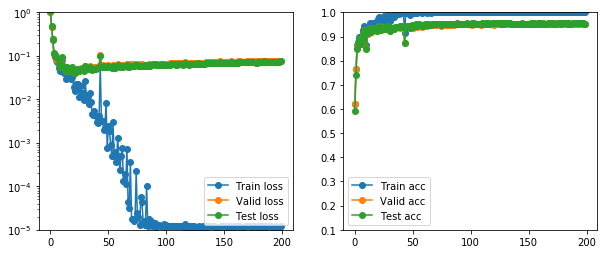

In [15]:
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax1.set_ylim(1e-5,1)
ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])